In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
data = [train_data, test_data]
for df in data:
    df.loc[df['avg_training_score'] > 73,'tr_score_cat'] = 'H'
    df.loc[df['avg_training_score'] < 60,'tr_score_cat'] = 'L'
    df.loc[(df['avg_training_score'] <= 73) & (df['avg_training_score'] >=
                                               60),'tr_score_cat'] = 'M'

In [6]:
r1 = ['region_1','region_10','region_11','region_12','region_13','region_14','region_15','region_16','region_31','region_30','region_27','region_26','region_20','region_2','region_19','region_8']
r2 = ['region_17','region_4','region_7','region_3','region_28','region_25','region_23','region_22']
r3 = ['region_18','region_9','region_6','region_5','region_34','region_33','region_32','region_29','region_24','region_21']

In [7]:
for df in data:
    df.loc[df['region'].isin(r1) ,'region_gp'] = 1
    df.loc[df['region'].isin(r2) ,'region_gp'] = 2
    df.loc[df['region'].isin(r3) ,'region_gp'] = 3

In [8]:
for df in data:
    df['KPI_AWard']  = df['KPIs_met >80%'] + df['awards_won?']
    df['KPI_Rating']  = df['KPIs_met >80%'] + df['previous_year_rating']
    df['AWard_Rating']  = df['awards_won?'] + df['previous_year_rating']

In [9]:
#numeric = ['avg_training_score', 'age', 'length_of_service', 'no_of_trainings']
#category = ['KPIs_met >80%', 'awards_won?' ,'previous_year_rating', 'department', 'region', 'education', 'gender', 'recruitment_channel']

In [10]:
#for i in category:
    #train_data[i] = train_data[i].astype('category')
    #test_data[i] = test_data[i].astype('category')

#train_data['is_promoted'] = train_data['is_promoted'].astype('category')

In [11]:
train_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
tr_score_cat               0
region_gp                  0
KPI_AWard                  0
KPI_Rating              4124
AWard_Rating            4124
dtype: int64

In [12]:
test_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
tr_score_cat               0
region_gp                  0
KPI_AWard                  0
KPI_Rating              1812
AWard_Rating            1812
dtype: int64

In [13]:
# Filling Null values
#train_data['education'] = train_data['education'].cat.add_categories('No Degree')
train_data['education'].fillna('No Degree',inplace = True)
#test_data['education'] = test_data['education'].cat.add_categories('No Degree')
test_data['education'].fillna('No Degree',inplace = True)

In [14]:
# Filling Null values
#train_data['previous_year_rating'] = train_data['previous_year_rating'].cat.add_categories('-999')
train_data['previous_year_rating'].fillna(-999,inplace = True)
#test_data['previous_year_rating'] = test_data['previous_year_rating'].cat.add_categories('-999')
test_data['previous_year_rating'].fillna(-999,inplace = True)

In [15]:
# Filling Null values
#train_data['previous_year_rating'] = train_data['previous_year_rating'].cat.add_categories('-999')
train_data['KPI_Rating'].fillna(-999,inplace = True)
#test_data['previous_year_rating'] = test_data['previous_year_rating'].cat.add_categories('-999')
test_data['KPI_Rating'].fillna(-999,inplace = True)

In [16]:
# Filling Null values
#train_data['previous_year_rating'] = train_data['previous_year_rating'].cat.add_categories('-999')
train_data['AWard_Rating'].fillna(-999,inplace = True)
#test_data['previous_year_rating'] = test_data['previous_year_rating'].cat.add_categories('-999')
test_data['AWard_Rating'].fillna(-999,inplace = True)

In [17]:
train_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
tr_score_cat            0
region_gp               0
KPI_AWard               0
KPI_Rating              0
AWard_Rating            0
dtype: int64

In [18]:
# Scaling
#scaler = StandardScaler()
#for i in numeric:
#   train_data[i] = scaler.fit_transform(train_data[i].values.reshape(-1,1))
#   test_data[i] = scaler.fit_transform(test_data[i].values.reshape(-1,1))

In [19]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,tr_score_cat,region_gp,KPI_AWard,KPI_Rating,AWard_Rating
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,L,2.0,1,6.0,5.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,M,2.0,0,5.0,5.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,L,1.0,0,3.0,3.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,L,2.0,0,1.0,1.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,M,1.0,0,3.0,3.0


In [20]:
#LabelEncoding
category_encode = ['previous_year_rating', 'department', 'region', 'education', 'gender', 'recruitment_channel','tr_score_cat','region_gp']
le = LabelEncoder()
for i in category_encode:
    train_data[i] = le.fit_transform(train_data[i])
    test_data[i] = le.transform(test_data[i])

In [21]:
#droping employee_id
train_data.drop('employee_id', axis=1, inplace=True)
Emp_ID = test_data['employee_id']
test_data.drop('employee_id', axis=1, inplace=True)

In [22]:
train_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,tr_score_cat,region_gp,KPI_AWard,KPI_Rating,AWard_Rating
0,7,31,2,0,2,1,35,5,8,1,0,49,0,1,1,1,6.0,5.0
1,4,14,0,1,0,1,30,5,4,0,0,60,0,2,1,0,5.0,5.0
2,7,10,0,1,2,1,34,3,7,0,0,50,0,1,0,0,3.0,3.0
3,7,15,0,1,0,2,39,1,10,0,0,50,0,1,1,0,1.0,1.0
4,8,18,0,1,0,1,45,3,2,0,0,73,0,2,0,0,3.0,3.0


In [23]:
test_data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,tr_score_cat,region_gp,KPI_AWard,KPI_Rating,AWard_Rating
0,8,18,0,1,2,1,24,0,1,1,0,77,0,0,1,-999.0,-999.0
1,2,28,0,0,0,1,31,3,5,0,0,51,1,1,0,3.0,3.0
2,7,4,0,1,0,1,31,1,4,0,0,47,1,0,0,1.0,1.0
3,5,11,0,0,0,3,31,2,9,0,0,65,2,0,0,2.0,2.0
4,1,21,0,1,2,1,30,4,7,0,0,61,2,2,0,4.0,4.0


In [24]:
# train test split
X = train_data.drop("is_promoted",axis=1)
Y = train_data["is_promoted"]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42, stratify = Y)

In [25]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [26]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:logistic',
}


In [27]:
params['eval_metric'] = "logloss"
num_boost_round = 999

In [28]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=100
)

[0]	Test-logloss:0.496994
Will train until Test-logloss hasn't improved in 100 rounds.
[1]	Test-logloss:0.391314
[2]	Test-logloss:0.324795
[3]	Test-logloss:0.282938
[4]	Test-logloss:0.2492
[5]	Test-logloss:0.226897
[6]	Test-logloss:0.212656
[7]	Test-logloss:0.202516
[8]	Test-logloss:0.193865
[9]	Test-logloss:0.187322
[10]	Test-logloss:0.183556
[11]	Test-logloss:0.180516
[12]	Test-logloss:0.178308
[13]	Test-logloss:0.175218
[14]	Test-logloss:0.174017
[15]	Test-logloss:0.17273
[16]	Test-logloss:0.171304
[17]	Test-logloss:0.170958
[18]	Test-logloss:0.170772
[19]	Test-logloss:0.170657
[20]	Test-logloss:0.170356
[21]	Test-logloss:0.169902
[22]	Test-logloss:0.169372
[23]	Test-logloss:0.169382
[24]	Test-logloss:0.169343
[25]	Test-logloss:0.169107
[26]	Test-logloss:0.169184
[27]	Test-logloss:0.169232
[28]	Test-logloss:0.168274
[29]	Test-logloss:0.168367
[30]	Test-logloss:0.168305
[31]	Test-logloss:0.167653
[32]	Test-logloss:0.167975
[33]	Test-logloss:0.167942
[34]	Test-logloss:0.168142
[35]	Te

In [29]:
print("Best Logloss: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best Logloss: 0.17 with 42 rounds


In [30]:
dtrain = xgb.DMatrix(train_data.drop("is_promoted",axis=1), label=train_data['is_promoted'])
dtest = xgb.DMatrix(test_data)

C:\Users\User\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [31]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'logloss'},
    early_stopping_rounds=100
)
cv_results

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.498719,0.000329,0.499242,0.001890
1,0.389428,0.000778,0.390560,0.003128
2,0.323225,0.000837,0.324869,0.003768
3,0.279149,0.001909,0.281353,0.004700
4,0.247114,0.002092,0.249678,0.005336
5,0.224939,0.001745,0.227880,0.006758
6,0.209475,0.002026,0.212645,0.006839
7,0.197980,0.001544,0.201668,0.006596
8,0.189123,0.001694,0.193151,0.006488
9,0.182350,0.001249,0.186676,0.006405


In [32]:
cv_results['test-logloss-mean'].min()

0.16557539999999998

In [33]:
# You can try wider intervals with a larger step between
# each value and then narrow it down. Here after several
# iteration I found that the optimal value was in the
# following ranges.
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(7,10)
    for min_child_weight in range(5,8)
]

In [34]:
# Define initial best params and Logloss
min_logloss = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'logloss'},
        early_stopping_rounds=100
    )
    # Update best MAE
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tLogLoss {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, logloss: {}".format(best_params[0], best_params[1], min_logloss))

CV with max_depth=7, min_child_weight=5


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	LogLoss 0.165912 for 36 rounds
CV with max_depth=7, min_child_weight=6
	LogLoss 0.165544 for 40 rounds
CV with max_depth=7, min_child_weight=7
	LogLoss 0.1659192 for 33 rounds
CV with max_depth=8, min_child_weight=5
	LogLoss 0.1662502 for 33 rounds
CV with max_depth=8, min_child_weight=6
	LogLoss 0.1668366 for 30 rounds
CV with max_depth=8, min_child_weight=7
	LogLoss 0.166424 for 36 rounds
CV with max_depth=9, min_child_weight=5
	LogLoss 0.1672172 for 26 rounds
CV with max_depth=9, min_child_weight=6
	LogLoss 0.1668898 for 28 rounds
CV with max_depth=9, min_child_weight=7
	LogLoss 0.166949 for 30 rounds
Best params: 7, 6, logloss: 0.165544


In [35]:
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]

In [36]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [37]:
min_logloss = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'logloss'},
        early_stopping_rounds=100
    )
    # Update best score
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = (subsample,colsample)
print("Best params: {}, {}, Logloss: {}".format(best_params[0], best_params[1], min_logloss))

CV with subsample=1.0, colsample=1.0


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	MAE 0.165544 for 40 rounds
CV with subsample=1.0, colsample=0.9
	MAE 0.16554059999999998 for 36 rounds
CV with subsample=1.0, colsample=0.8
	MAE 0.1651968 for 38 rounds
CV with subsample=1.0, colsample=0.7
	MAE 0.1657892 for 36 rounds
CV with subsample=0.9, colsample=1.0
	MAE 0.1669066 for 37 rounds
CV with subsample=0.9, colsample=0.9
	MAE 0.16651339999999998 for 37 rounds
CV with subsample=0.9, colsample=0.8
	MAE 0.166336 for 33 rounds
CV with subsample=0.9, colsample=0.7
	MAE 0.16627240000000001 for 38 rounds
CV with subsample=0.8, colsample=1.0
	MAE 0.16780299999999998 for 42 rounds
CV with subsample=0.8, colsample=0.9
	MAE 0.1669862 for 30 rounds
CV with subsample=0.8, colsample=0.8
	MAE 0.16731659999999998 for 43 rounds
CV with subsample=0.8, colsample=0.7
	MAE 0.167471 for 42 rounds
CV with subsample=0.7, colsample=1.0
	MAE 0.1681516 for 30 rounds
CV with subsample=0.7, colsample=0.9
	MAE 0.16790000000000002 for 24 rounds
CV with subsample=0.7, colsample=0.8
	MAE 0.1681536 for 

In [38]:
params['subsample'] = best_params[0]
params['colsample_bytree'] = best_params[1]

In [39]:
%time
# This can take some time…
min_logloss = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['logloss'],early_stopping_rounds=100)
    # Update best score
    mean_logloss = cv_results['test-logloss-mean'].min()
    boost_rounds = cv_results['test-logloss-mean'].argmin()
    print("\tLogloss {} for {} rounds\n".format(mean_logloss, boost_rounds))
    if mean_logloss < min_logloss:
        min_logloss = mean_logloss
        best_params = eta
        
print("Best params: {}, Logloss: {}".format(best_params, min_logloss))

Wall time: 0 ns
CV with eta=0.3
Wall time: 7.53 s
	Logloss 0.1651968 for 38 rounds

CV with eta=0.2


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  del sys.path[0]


Wall time: 8.91 s
	Logloss 0.16437820000000003 for 60 rounds

CV with eta=0.1
Wall time: 13.5 s
	Logloss 0.16436420000000002 for 148 rounds

CV with eta=0.05
Wall time: 21 s
	Logloss 0.16394219999999998 for 284 rounds

CV with eta=0.01
Wall time: 55.6 s
	Logloss 0.16458679999999998 for 998 rounds

CV with eta=0.005
Wall time: 56.5 s
	Logloss 0.17045400000000002 for 998 rounds

Best params: 0.05, Logloss: 0.16394219999999998


In [40]:
params['eta'] = best_params

In [41]:
params

{'max_depth': 7,
 'min_child_weight': 6,
 'eta': 0.05,
 'subsample': 1.0,
 'colsample_bytree': 0.8,
 'objective': 'reg:logistic',
 'eval_metric': 'logloss'}

In [42]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [43]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=100
)

[0]	Test-logloss:0.655686
Will train until Test-logloss hasn't improved in 100 rounds.
[1]	Test-logloss:0.621821
[2]	Test-logloss:0.59086
[3]	Test-logloss:0.562654
[4]	Test-logloss:0.537599
[5]	Test-logloss:0.513918
[6]	Test-logloss:0.491987
[7]	Test-logloss:0.472084
[8]	Test-logloss:0.453595
[9]	Test-logloss:0.437409
[10]	Test-logloss:0.421628
[11]	Test-logloss:0.406925
[12]	Test-logloss:0.393134
[13]	Test-logloss:0.38003
[14]	Test-logloss:0.368547
[15]	Test-logloss:0.357832
[16]	Test-logloss:0.347526
[17]	Test-logloss:0.338241
[18]	Test-logloss:0.328954
[19]	Test-logloss:0.320829
[20]	Test-logloss:0.312936
[21]	Test-logloss:0.305701
[22]	Test-logloss:0.298561
[23]	Test-logloss:0.29261
[24]	Test-logloss:0.286817
[25]	Test-logloss:0.281536
[26]	Test-logloss:0.276644
[27]	Test-logloss:0.270615
[28]	Test-logloss:0.266147
[29]	Test-logloss:0.261491
[30]	Test-logloss:0.257247
[31]	Test-logloss:0.252525
[32]	Test-logloss:0.248794
[33]	Test-logloss:0.245032
[34]	Test-logloss:0.241562
[35]	Te

[296]	Test-logloss:0.166857
[297]	Test-logloss:0.166883
[298]	Test-logloss:0.16689
[299]	Test-logloss:0.166891
[300]	Test-logloss:0.166891
[301]	Test-logloss:0.166928
[302]	Test-logloss:0.166868
[303]	Test-logloss:0.16687
[304]	Test-logloss:0.166853
[305]	Test-logloss:0.166875
[306]	Test-logloss:0.166874
[307]	Test-logloss:0.166899
[308]	Test-logloss:0.166882
[309]	Test-logloss:0.16693
[310]	Test-logloss:0.166925
[311]	Test-logloss:0.166924
[312]	Test-logloss:0.166934
[313]	Test-logloss:0.166938
[314]	Test-logloss:0.16694
[315]	Test-logloss:0.166967
[316]	Test-logloss:0.166968
[317]	Test-logloss:0.167011
[318]	Test-logloss:0.166978
[319]	Test-logloss:0.166969
[320]	Test-logloss:0.166971
[321]	Test-logloss:0.166987
[322]	Test-logloss:0.166998
[323]	Test-logloss:0.166971
[324]	Test-logloss:0.166978
[325]	Test-logloss:0.166977
[326]	Test-logloss:0.166994
[327]	Test-logloss:0.167001
[328]	Test-logloss:0.167038
[329]	Test-logloss:0.167029
[330]	Test-logloss:0.167031
[331]	Test-logloss:0.167

In [44]:
print("Best Logloss: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best Logloss: 0.17 with 305 rounds


In [45]:
boost_round = model.best_iteration+1

In [46]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round= boost_round
)

In [47]:
y_pred = model.predict(dtest)

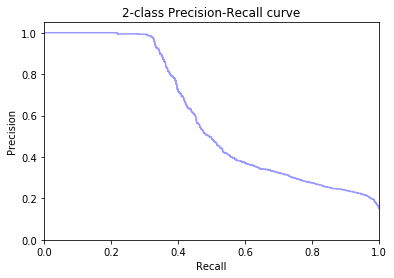

In [48]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
 
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

Threshold cutoff:  0.33103546500205994
Max F1-score at cut-off :  0.5210401891252955


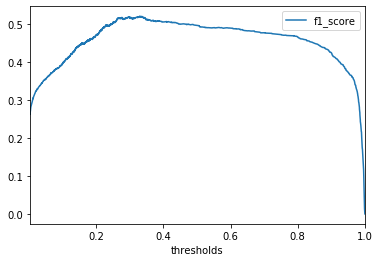

In [49]:
scrs = pd.DataFrame({'precision' : precision, 'recal' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())
scrs.plot(x='thresholds', y='f1_score')

In [50]:
threshold_cutoff = scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0]

In [51]:
dtrain = xgb.DMatrix(train_data.drop("is_promoted",axis=1), label=train_data['is_promoted'])
dtest = xgb.DMatrix(test_data)

In [52]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round= boost_round
)

In [53]:
def xgb_pred(y, threshold= threshold_cutoff):
    y_bin = [1 if y_cont > threshold else 0 for y_cont in y] # binarizing your output
    return y_bin

In [54]:
pred = model.predict(dtest)
pred_new  = xgb_pred(pred)

In [55]:
d = {'employee_id': Emp_ID, 'is_promoted': pred_new}
upload_XGB1 = pd.DataFrame(d)
upload_XGB1.to_csv("upload_XGB1.csv",index=False)